# Machine Learning and Statistics Project 2020

In [ ]:
# Import all necessary libraries

# Numerical arrays
import numpy as np

#For plotting
import matplotlib.pyplot as plt

%matplotlib inline 
# Magic fix

# Data frames
import pandas as pd

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures

# To split dataset into train and test parts
from sklearn.model_selection import train_test_split

# To calculate mean_squared_error
from sklearn.metrics import mean_squared_error

#Plotting library
import seaborn as sns

# machine learning
import sklearn.linear_model as lm

# Import neural networks
import tensorflow.keras as kr

# To use gradient boosting regression model
from sklearn.ensemble import GradientBoostingRegressor

# to use randomforest regression model
from sklearn.ensemble import RandomForestRegressor

For the project of this module we have been asked to create a web service that uses machine learning to make predictions based on the data in dataset <i>power production</i>. The goal is to produce a model that accurately predicts the wind turbine power output from the wind speed. After that, we have to develop a web service that will respond with predicted power values, based on speed values sent as HTTP requests.

### Exploration of dataset and preprocessing

Let's have a look at the dataset first. And then use regression to look at the relationship between wind speed and power output.

In [ ]:
windpower = pd.read_csv('https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv')
windpower

In [ ]:
windpower.isna().sum() # Check for missing values. https://www.analyticsvidhya.com/blog/2020/01/build-your-first-machine-learning-pipeline-using-scikit-learn/?utm_source=blog&utm_medium=polynomial-regression-python

It turns out there are no missing values. That means the dataset consists of 500 measured values of wind speed and the corresponding power outputs.

In [ ]:
windpower.describe()

In [ ]:
sns.pairplot(windpower)

There is clearly a correlation between the wind speed x and the power y. Up until a wind-speed value of about 8, the output-power is close to 0. Also it looks as if there is a certain maximum power output, that is reached at about 18 mph. It looks like there might have been a problem with the wind turbine(perhaps a powercut, or maintenance work), as there are some instances of 0 power output, despite high wind speeds. It might be wise to remove these values to make the machine learning process easier.

I will remove all values where power is 0 and speed is bigger than 10. These are nearly certainly measurements that were not taken during normal operation of the wind turbine and as such will only hinder our machine learning process.

In [ ]:
windpowernew = windpower.drop(windpower[(windpower["speed"]> 10) & (windpower["power"]==0)].index)
# Adapted from https://www.geeksforgeeks.org/drop-rows-from-the-dataframe-based-on-certain-condition-applied-on-a-column/

In [ ]:
windpowernew

14 unwanted values have been removed.

### Using supervised machine learning on the dataset

Since we know which y values correspond to which x values, we can use supervised machine learning to train a model to make predictions based on our dataset. Before I am going to use the dataset to build a model, I am going to split it in a train and a test set, so we can evaluate the model with data the model hasn't seen before.

In [ ]:
x = windpowernew.speed.values.reshape(-1,1) # Reshape to values between -1 and 1 so we can use regression analysis later
y = windpowernew["power"]

In [ ]:
# Splitting the dataset into the Training set and Test set
 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) # Using random state to make test reproducible.

In [ ]:
x_train #388 random values to be used to train the model. The values correspond with y_train

In [ ]:
x_test #98 random values to be used to test the model. Values correspond with y_test

In [ ]:
y_test

### Regression

Regression is a way to look at the relationship between a dependent and one or more independent variables. In this case, we are going to look at the possible correlation between the wind speed input, and the power output. If there is indeed a relationship, then it is crucial to find the best possible formula for making predictions based on the input (wind speed) values. First we need to choose which regression style fits our dataset the best.

#### Linear regression

In [ ]:
modellin = LinearRegression().fit(x_train, y_train) # LinearRegresion creates the object that represents the model,
# while.fit() trains the model and returns it. #https://realpython.com/train-test-split-python-data/

In [ ]:
modellin.score(x_train, y_train)

In [ ]:
modellin.score(x_test, y_test)

<i>.score()</i> returns R² (coeffecient of determination) for the data passed in. The maximum value is 1, which would mean a perfect fit. The R² calculated with the test data is an unbiased measure of that model's prediction performance. https://realpython.com/train-test-split-python-data/

It is best practice to use the <i>.score()</i> value obtained from the test set, as it represents an unbiased estimation of performance

Our linear regression model is not doing too great on predicting y values, so let's have a look at two other potentially useful models.

#### Gradient Boosting Regressor

Gradient boosting is a machine learning technique for regression problems. It produces a prediction model, based on many combined weak prediction models. It is a method of converting weak learners into strong learners. Gradient boosting starts with a single decision tree, and then identifies it's shortcomings by comparing the predicted and true values in a loss functions. In that loss function, it uses gradients to identify the error (y=ax+b+e, where e is the error term).
So in this case, the loss function would be based off the error between true and predicted wind speeds. This process is repeated for many small models.If a model predicts observerations accurately, these observations are left for the original model, but where the model struggles, another, modified model is created to try and get it's predictions closer to the real values. Numerous models are created this way, increasing and decreasing weights depending on how close the prediction was to the real value. Eventually this leads to a final ensemble model, that has been optimized to get it's predictions as close as possible to the real values. 
#https://towardsdatascience.com/understanding-gradient-boosting-machines-9be756fe76ab
#https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/

In [ ]:
modelgbr = GradientBoostingRegressor(random_state=0).fit(x_train, y_train)
modelgbr.score(x_test, y_test)

#### Random Forest Regressor

A random forest is an ensemble technique capable of performing regression and classification tasks. It uses multiple decision trees and a technique called bagging. #https://medium.com/datadriveninvestor/random-forest-regression-9871bc9a25eb

![](randomforestr.jpeg)

Bagging means the training of each decision tree on a different data sample, where sampling is done with replacement.
Multiple decision trees are then combined to determine the final prediction, rather than relying on individual decision trees.

In [ ]:
modelrfr = RandomForestRegressor(random_state=0).fit(x_train, y_train)
modelrfr.score(x_test, y_test)

In [29]:
modelrfr.predict(x)

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 2.1655000e-01,
       8.9064000e-01, 2.9695200e+00, 3.2440500e+00, 5.0703200e+00,
       5.7283500e+00, 5.7825000e+00, 5.7391900e+00, 5.6331100e+00,
       6.3027500e+00, 7.7938000e+00, 8.5812200e+00, 3.1711300e+00,
       3.1430100e+00, 4.5667300e+00, 2.6250900e+00, 5.1806100e+00,
       2.6521000e+00, 2.3980400e+00, 2.9568000e+00, 4.6998300e+00,
       1.9039200e+00, 1.3969500e+00, 4.8318000e-01, 2.9982000e-01,
       9.9812000e-01, 3.5738600e+00, 4.9541400e+00, 1.8941800e+00,
       3.3456100e+00, 2.8260600e+00, 3.3091000e+00, 1.9414300e+00,
       5.2894500e+00, 3.1796700e+00, 3.1966300e+00, 1.1574300e+00,
       3.1784900e+00, 4.7952500e+00, 9.4070000e-02, 9.7490000e-02,
       2.7010000e-02, 2.3985900e+00, 1.9458800e+00, 8.2742000e-01,
       3.4808300e+00, 5.6664300e+00, 2.8055200e+00, 3.1553200e+00,
       2.1794100e+00, 5.7575600e+00, 6.0470700e+00, 2.8635100e+00,
       2.7063200e+00, 2.7089700e+00, 2.8003200e+00, 2.9748500e

In [179]:
x = windpowernew.speed.values.reshape(-1,1) # Reshape to values between -1 and 1 so we can use regression analysis
y = windpowernew["power"]

In [180]:
predlin = modellin.predict(x)
predgbr = modelgbr.predict(x)
predrfr = modelrfr.predict(x)

Plot the predictions of modelgbr against actual y values

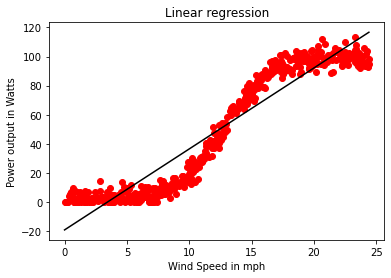

In [181]:
plt.scatter(x, y, color='red')
plt.plot(x, predlin, color='black') #Plot predictions of linear regression model in black, against actual y output values in red.
plt.title('Linear regression')
plt.xlabel('Wind Speed in mph')
plt.ylabel('Power output in Watts')
plt.show()



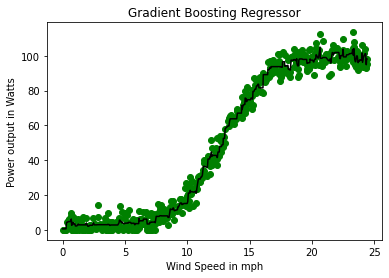

In [182]:
plt.scatter(x, y, color='green')
plt.plot(x, predgbr, color='black') #Plot predictions of GradientBoostingRegressor in black, against actual y output values in pink.
plt.title('Gradient Boosting Regressor')
plt.xlabel('Wind Speed in mph')
plt.ylabel('Power output in Watts')
plt.show()

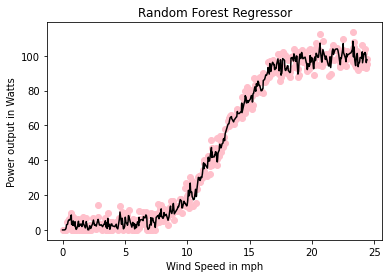

In [183]:
plt.scatter(x, y, color='pink')
plt.plot(x, predrfr, color='black') #Plot predictions of Random Forest Regressor in black, against actual y output values in pink.
plt.title('Random Forest Regressor')
plt.xlabel('Wind Speed in mph')
plt.ylabel('Power output in Watts')
plt.show()
   

Both the gradient boosting regressor, as the random forest regressor methods give much more accurate results than the linear regression model. The gradient boosting method performs marginally better, so will use this as my model to predict power output from wind speed. 

#### User input as input for model

Let's test our chosen model with a user input value. This is something I will be doing later with the web service as well, so important that this part works.

In [199]:
arr = np.array(input().split(), dtype='float') # Split the input string into a list. Then convert the list into a numpy array.
# Adapted from https://stackoverflow.com/questions/61246741/how-to-take-user-input-from-a-single-line-in-numpy-array

6


In [200]:
inpvalue = arr.reshape(-1,1)

In [201]:
modelgbr.predict(inpvalue)

array([3.62000196])

#### Random number as input for model

In [202]:
rdarr = np.array(np.random.uniform(low=1, high=24.0)) # Generate a random number between 1 and 24, representing the wind speed. Between those values our model works most accurately.

In [203]:
rdarr

array(19.66456512)

In [204]:
rdarrrs = rdarr.reshape(-1,1) # Reshape the array to fit the model

In [205]:
rdarrrs

array([[19.66456512]])

In [206]:
modelgbr.predict(rdarrrs) # Let our gradient boosting model predict the power output 

array([96.06343461])

Explain regression methods above
TRY NEURAL NETWORK TRAINING?? Find examples

In [ ]:
# Fitting GradientBoostingRegressor to the dataset 
# Adapted from: https://towardsdatascience.com/machine-learning-polynomial-regression-with-python-5328e4e8a386

poly_reg = PolynomialFeatures(degree=1) #transfrom data into a polynomial.
X_poly = poly_reg.fit_transform(X)
pol_reg = GradientBoostingRegressor()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
def polymonial():
    plt.scatter(X, y, color='green')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='black')
    plt.title('Polynomial regression')
    plt.xlabel('Wind Speed in mph')
    plt.ylabel('Power output in Watts')
    plt.show()
    return
polymonial()

In [ ]:
x = windpowernew["speed"]

In [ ]:
y = windpowernew["power"]

In [ ]:
m, c = np.polyfit(x, y, 1) # Use regression on x and y with Numpy

In [ ]:
m, c # Numpy finds that, on average, x should roughly be multiplied by 5.55 and then take 18.87 away to get y values. 
# First value (what x will be multiplied with) will be called m from now on, and second value (to be taken away) will be called c.

In [ ]:
plt.plot(x, y, 'k.', label = "Measured data") # Plot x and y and regression line. https://web.microsoftstream.com/video/4486d827-1d6b-481a-a570-a6264ddf1c43
plt.plot(x, m * x + c, 'r-', label ="Best fit line")  # Plot a red best fit line

# Add axis labels and legend
plt.xlabel("wind-speed (mph)")
plt.ylabel("Power (Watts)")
plt.legend()

plt.show() # Show plot

There is clearly a relationship between the variables, and the best fit line is not awfully wrong, but I am going to try polynomial regression now, to see if it might fit even better.

#### Polynomial regression

Polynomial regression is a form of regression analysis. It is used when the relationship between x and y is nonlinear. It is a special case of linear regression where we fit a polynomial equation on the data with a curvilinear relationship between the target variable and the independent variables. # https://www.analyticsvidhya.com/blog/2020/03/polynomial-regression-python/

In [ ]:
X = windpowernew.speed.values.reshape(-1,1) # Reshape to values between -1 and 1 so we can use regression analysis

In [ ]:
y = windpowernew["power"]

In [ ]:
# Fitting Polynomial Regression to the dataset 
# Adapted from: https://towardsdatascience.com/machine-learning-polynomial-regression-with-python-5328e4e8a386

poly_reg = PolynomialFeatures(degree=9) #transfrom data into a polynomial. I have chosen an 9-degree polynomial
# which is quite complex, but it fits the dataset the best. 
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
def polymonial():
    plt.scatter(X, y, color='green')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='black')
    plt.title('Polynomial regression')
    plt.xlabel('Wind Speed in mph')
    plt.ylabel('Power output in Watts')
    plt.show()
    return
polymonial()

From the above plot we can instantly see that the polynomial regression fits the dataset better and will be more useful for predicting values of power output, using the wind speed.

In [ ]:
pol_reg.predict(poly_reg.fit_transform([[5]])) # Using the predict function to predict values of power output Y based on the wind speed X

In [ ]:
pol_reg.predict(poly_reg.fit_transform([[10]])) # Double checking if this prediction method exactly mimics the best fit line above.

In [ ]:
pol_reg.predict(poly_reg.fit_transform([[15]]))

In [ ]:
pol_reg.predict(poly_reg.fit_transform([[20]]))

In [ ]:
np.sqrt(mean_squared_error(y,poly_pred))

In [ ]:
# separate independent and target variable. Adapted from: https://www.analyticsvidhya.com/blog/2020/01/build-your-first-machine-learning-pipeline-using-scikit-learn/?utm_source=blog&utm_medium=polynomial-regression-python
train_X = windpowernew.speed.values.reshape(-1,1)
train_Y = windpowernew["power"]

In [ ]:
# Split the data at random
train_x, test_x, train_y, test_y = train_test_split(train_X, train_Y,test_size=0.25,random_state=0)

In [ ]:
# shape of train and test splits
train_x.shape, test_x.shape, train_y.shape, test_y.shape

Let's calculate the RMSE values of the linear regression model, as well as the polynomial regression model. The root mean squared error is the most popular evaluation metric used in regression problems. RMSE is a very valuable tool, but one of the downsides is, it is highly affected by outlier values. (PERHAPS REMOVE ALL 0 VALUES FROM DATASET?! calculate rmse for both with and without 0 values)

In [ ]:
# create an object of the LinearRegression Model
model_LR = LinearRegression()

# fit the model with the training data
model_LR.fit(train_x, train_y)

# predict the target on train and test data 
predict_train = model_LR.predict(train_x)
predict_test  = model_LR.predict(test_x)

# Root Mean Squared Error on train and test date
print('RMSE on train data: ', mean_squared_error(train_y, predict_train)**(0.5))
print('RMSE on test data: ',  mean_squared_error(test_y, predict_test)**(0.5))

When looking at the output values of the <i> pol_reg.predict </i> function, we can see they correspond perfectly with the best fit line, which in turn corresponds very well to the data points which were measured. It seems we have our model we can use for predicting power output from wind speeds.

One of the key aspects of supervised machine learning is model evaluation and validation. When you evaluate the predictive performance of your model, it’s essential that the process be unbiased. Using train_test_split() from the data science library scikit-learn, you can split your dataset into subsets that minimize the potential for bias in your evaluation and validation process. #https://realpython.com/train-test-split-python-data/

Now, let's use machinelearning to predict the power output from the wind speed. Add, train and test neural network

In [ ]:
https://web.microsoftstream.com/video/4486d827-1d6b-481a-a570-a6264ddf1c43 Video on regression using skikit-learn by Ian Mcloughlin 
    Plotting polynomial: https://www.analyticsvidhya.com/blog/2020/03/polynomial-regression-python/